# the-croatian-cruyff

Visualisations with mplsoccer using StatsBomb open data.

In [167]:
from statsbombpy import sb
%matplotlib inline
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import matplotlib.patches as mpatches
from functools import reduce
import plotly.graph_objects as px
import plotly.express as px
import plotly.graph_objs as go
import warnings
from plotly.validators.scatter.marker import SymbolValidator
import chart_studio.plotly as py
import chart_studio.tools as tls
import chart_studio
import math
from plotly.subplots import make_subplots
from dash import Dash, dcc, html, Input, Output
from mplsoccer.pitch import Pitch
from mplsoccer.utils import add_image
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
from matplotlib.colors import LinearSegmentedColormap
import cmasher as cmr
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
from matplotlib.colors import to_rgba
from mplsoccer.pitch import Pitch
from mplsoccer.utils import add_image
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
from matplotlib.colors import LinearSegmentedColormap
import cmasher as cmr

from mplsoccer import VerticalPitch, Sbopen
from mplsoccer.utils import FontManager

In [168]:
#Get All Croatia Event Data via Statsbomb API
wc_matches = sb.matches(competition_id=43, season_id=3)
columns = ['match_id', 'home_team', 'away_team', 'home_score', 'away_score', 'competition_stage']
wc_matches_croatia = wc_matches[(wc_matches.home_team == "Croatia") | (wc_matches.away_team == "Croatia")]
wc_matches_croatia = wc_matches_croatia.sort_values(by="match_date")
wc_matches_croatia = wc_matches_croatia[columns]
matchid_list = wc_matches_croatia["match_id"].tolist()
print(wc_matches_croatia)
croatia_events_df = sb.events(match_id=7529)
croatia_events_df = croatia_events_df[0:0] 
for i in matchid_list:
    events_df = sb.events(match_id=i)
    croatia_events_df = croatia_events_df.append(events_df)

credentials were not supplied. open data access only
    match_id  home_team away_team  home_score  away_score competition_stage
18      7529    Croatia   Nigeria           2           0       Group Stage
30      7545  Argentina   Croatia           0           3       Group Stage
33      7561    Iceland   Croatia           1           2       Group Stage
16      7581    Croatia   Denmark           1           1       Round of 16
60      8652     Russia   Croatia           2           2    Quarter-finals
53      8656    Croatia   England           2           1       Semi-finals
32      8658     France   Croatia           4           2             Final
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not 

In [169]:
#Create MatchSeq column which combines match id with possession no - means that we have a unique number for each possession sequence
croatia_events_df["MatchSeq"] = croatia_events_df["match_id"].astype(str) + '_' + croatia_events_df["possession"].astype(str)
#print(croatia_events_df.MatchSeq)

In [170]:
#Modric Pass Dataframe: split x and y coordinates into separate columns
lm_passes_df = croatia_events_df[(croatia_events_df.player == "Luka Modrić") & (croatia_events_df.type == "Pass") & (croatia_events_df["pass_type"].isnull()) & (croatia_events_df["pass_outcome"].isnull())]
lm_passes_df['x'], lm_passes_df['y'] = zip(*list(lm_passes_df['location'].values))
lm_passes_df['x_end'], lm_passes_df['y_end'] = zip(*list(lm_passes_df['pass_end_location'].values))

In [171]:
#Modric Carry Dataframe: split x and y coordinates into separate columns
lm_carries_df = croatia_events_df[(croatia_events_df.player == "Luka Modrić") & (croatia_events_df.type == "Carry")]
lm_carries_df['x'], lm_carries_df['y'] = zip(*list(lm_carries_df['location'].values))
lm_carries_df['x_end'], lm_carries_df['y_end'] = zip(*list(lm_carries_df['carry_end_location'].values))

## Pressure & Defensive Actions (Recoveries in Cyan, Interceptions in Magenta, Duels in Yellow)

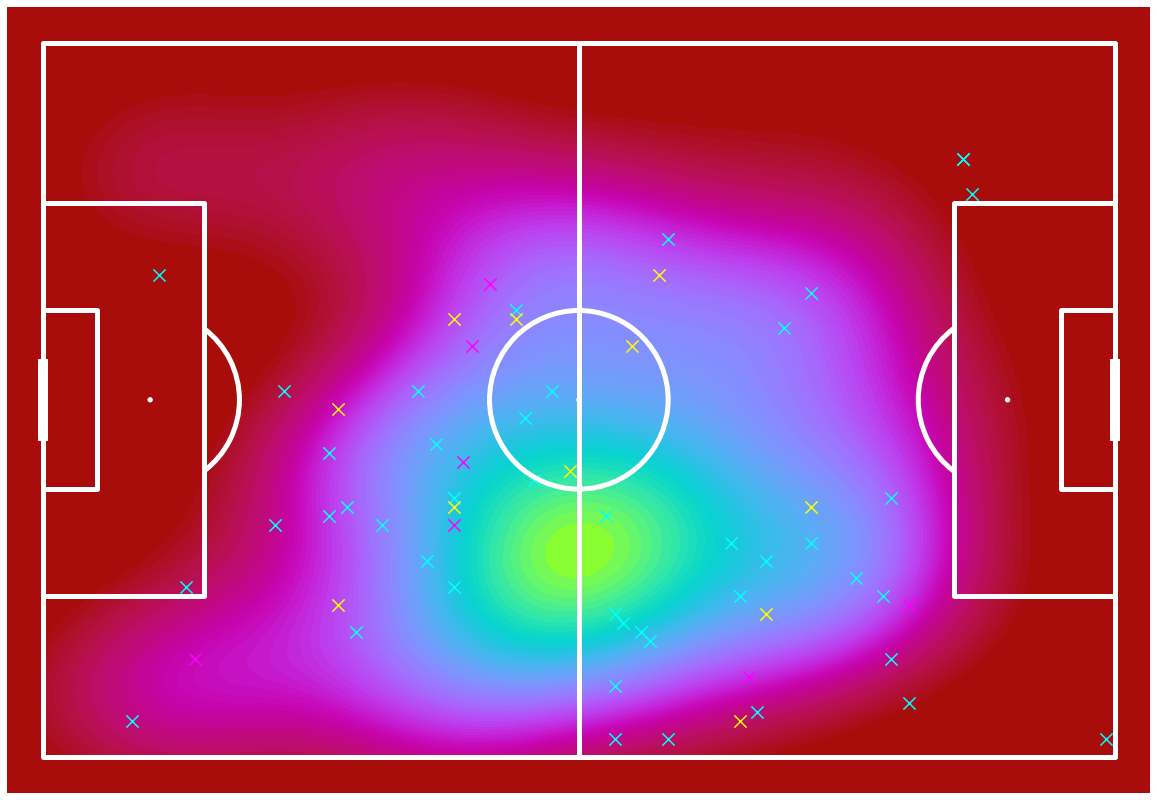

In [176]:
###Pressures and Defensive Actions
lm_press_df = croatia_events_df[(croatia_events_df.player == "Luka Modrić") & (croatia_events_df.type == "Pressure")]
lm_press_df['x'], lm_press_df['y'] = zip(*list(lm_press_df['location'].values))

lm_int_df = croatia_events_df[(croatia_events_df.player == "Luka Modrić") & (croatia_events_df.type == "Interception") ]
lm_int_df['x'], lm_int_df['y'] = zip(*list(lm_int_df['location'].values))
lm_duel_df = croatia_events_df[(croatia_events_df.player == "Luka Modrić") & (croatia_events_df.type == "Duel") ]
lm_duel_df['x'], lm_duel_df['y'] = zip(*list(lm_duel_df['location'].values))
lm_rec_df = croatia_events_df[(croatia_events_df.player == "Luka Modrić") & (croatia_events_df.type == "Ball Recovery") & (croatia_events_df.ball_recovery_recovery_failure != True)]
lm_rec_df['x'], lm_rec_df['y'] = zip(*list(lm_rec_df['location'].values))

pitch = Pitch(pitch_type='statsbomb', pitch_color='#A80D0B', line_zorder=3, line_color='white', linewidth=5)
#fig, ax = pitch.draw(figsize=(8,12))
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
kdeplot= pitch.kdeplot(lm_press_df.x, lm_press_df.y, ax=ax, shade=True, cmap=cmr.neon, levels=75)

sc_int = pitch.scatter(lm_int_df.x, lm_int_df.y,
                    c='#FF00FF',
                    s=150,
                    marker='x',
                    ax=ax)
sc_rec = pitch.scatter(lm_rec_df.x, lm_rec_df.y,
                    c='#00FFFF',
                    s=150,
                    marker='x',
                    ax=ax)
sc_duel = pitch.scatter(lm_duel_df.x, lm_duel_df.y,
                    c='#FFFC00',
                    s=150,
                    marker='x',
                    ax=ax)

plt.savefig('pressure.png')

## Passes and Carries in Shot Ending Sequences

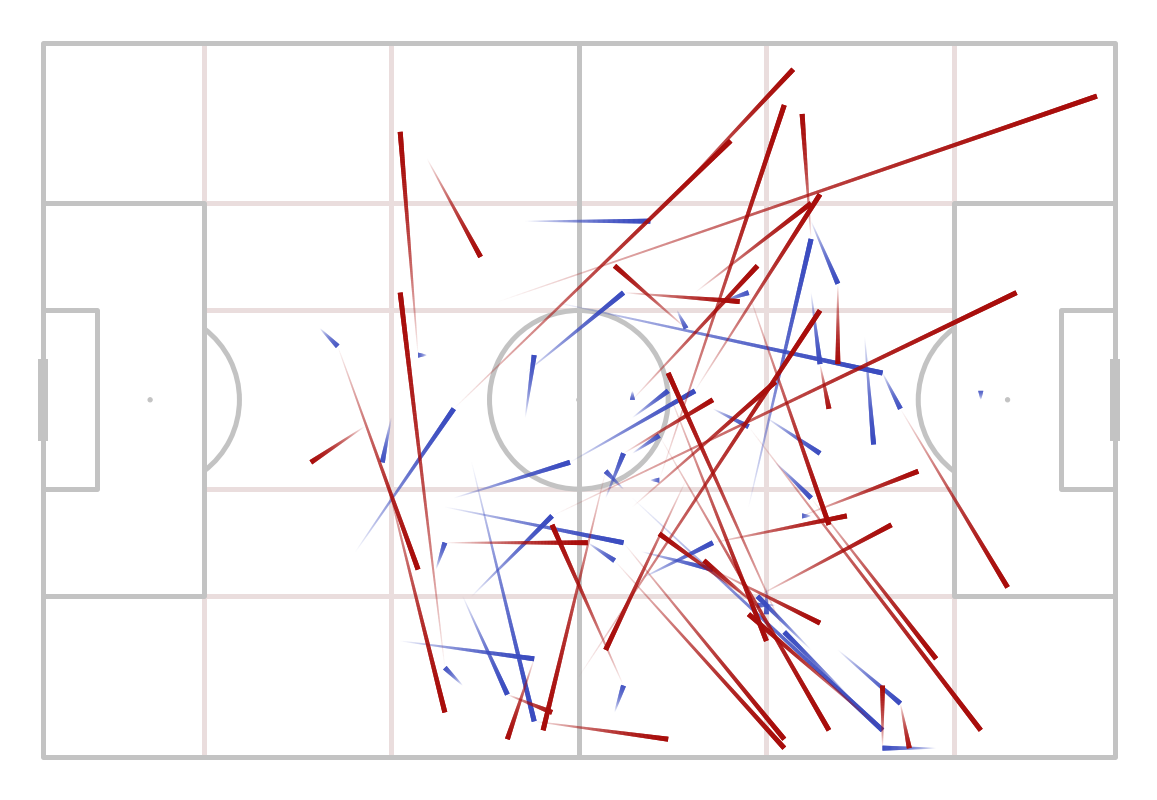

In [173]:
###Passes and Carries in Shot Ending Sequences

firsts_df = croatia_events_df.groupby('MatchSeq').first()
lm_first_df = firsts_df[(firsts_df.player == "Luka Modrić") & (firsts_df.play_pattern == "Regular Play")]
#goal_ending = croatia_events_df[(croatia_events_df.type == "Shot") & (croatia_events_df.team == "Croatia") & (croatia_events_df.shot_outcome == "Goal")]
goal_ending = croatia_events_df[(croatia_events_df.type == "Shot") & (croatia_events_df.team == "Croatia")]
goal_ending_list = goal_ending["MatchSeq"].tolist()
modric_all_df = croatia_events_df[(croatia_events_df.player =='Luka Modrić') & (croatia_events_df.play_pattern =='Regular Play')]
lm_goal_ending_df = modric_all_df[modric_all_df['MatchSeq'].isin(goal_ending_list)]

lm_goal_passes_df = lm_goal_ending_df[(lm_goal_ending_df.type == "Pass")]
lm_goal_passes_df['x'], lm_goal_passes_df['y'] = zip(*list(lm_goal_passes_df['location'].values))
lm_goal_passes_df['x_end'], lm_goal_passes_df['y_end'] = zip(*list(lm_goal_passes_df['pass_end_location'].values))
lm_goal_carry_df = lm_goal_ending_df[(lm_goal_ending_df.type == "Carry")]
lm_goal_carry_df['x'], lm_goal_carry_df['y'] = zip(*list(lm_goal_carry_df['location'].values))
lm_goal_carry_df['x_end'], lm_goal_carry_df['y_end'] = zip(*list(lm_goal_carry_df['carry_end_location'].values))

pitch = Pitch(positional=True, linewidth=5, pitch_type='statsbomb', pitch_color='none', line_color='#c3c3c3')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
pitch.lines(lm_goal_carry_df.x, lm_goal_carry_df.y,
             lm_goal_carry_df.x_end, lm_goal_carry_df.y_end, comet=True, transparent=True, color='#3B4CC0', ax=ax, label='Switches')

pitch.lines(lm_goal_passes_df.x, lm_goal_passes_df.y,
             lm_goal_passes_df.x_end, lm_goal_passes_df.y_end, comet=True, transparent=True, color='#A80D0B', ax=ax, label='goal ending')

plt.savefig('shotendingseq.png')

## Pass Start Locations versus Pass End Locations

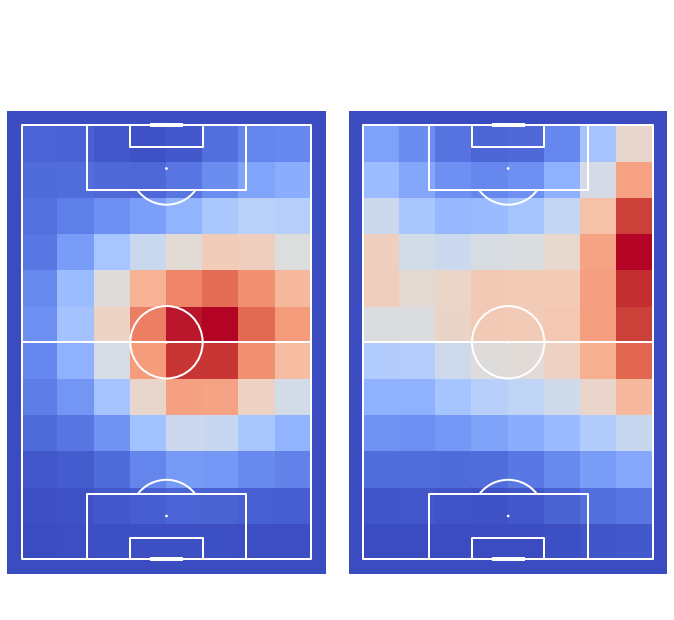

In [174]:
###Pass Start Locations v Pass End Locations
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#3B4CC0', line_zorder=2, line_color='white')

fig, axs = pitch.grid(ncols=2, axis=False, endnote_height=0.05)
bin_statistic = pitch.bin_statistic(lm_passes_df['x'], lm_passes_df['y'], statistic='count', bins=(12, 8))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
heatb4 = pitch.heatmap(bin_statistic, ax=axs['pitch'][0], cmap='coolwarm')

bin_statistic = pitch.bin_statistic(lm_passes_df['x_end'], lm_passes_df['y_end'], statistic='count', bins=(12, 8))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
heatafter = pitch.heatmap(bin_statistic, ax=axs['pitch'][1], cmap='coolwarm')

plt.savefig('passlocheatmap.png')
plt.show()

## Croatia World Cup Final: Pass Network

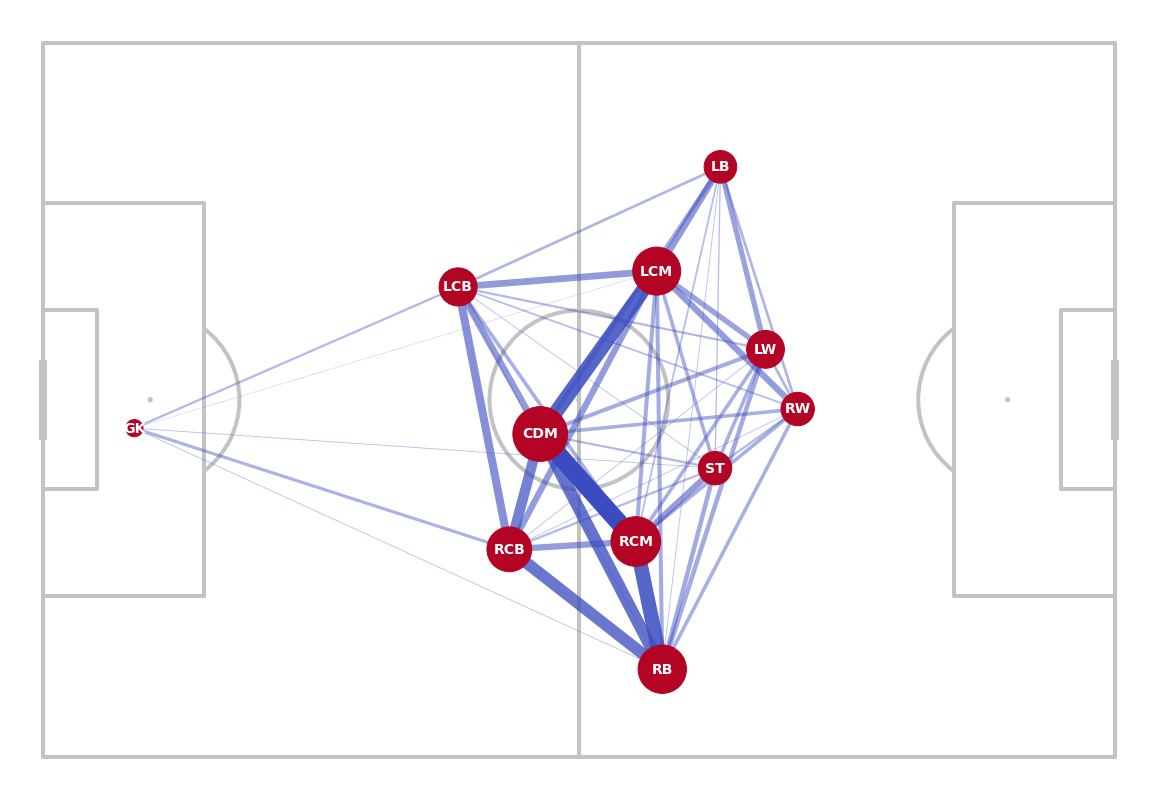

In [175]:
###produced from the mplsoccer example provided here: https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_pass_network.html
parser = Sbopen()
events, related, freeze, players = parser.event(8658)
TEAM = 'Croatia'
OPPONENT = 'World Cup 2018 Final'
events.loc[events.tactics_formation.notnull(), 'tactics_id'] = events.loc[
    events.tactics_formation.notnull(), 'id']
events[['tactics_id', 'tactics_formation']] = events.groupby('team_name')[[
    'tactics_id', 'tactics_formation']].ffill()
formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'ST', 24: 'LCF', 25: 'SS'}
players['position_abbreviation'] = players.position_id.map(formation_dict)
sub = events.loc[events.type_name == 'Substitution',
                 ['tactics_id', 'player_id', 'substitution_replacement_id',
                  'substitution_replacement_name']]
players_sub = players.merge(sub.rename({'tactics_id': 'id'}, axis='columns'),
                            on=['id', 'player_id'], how='inner', validate='1:1')
players_sub = (players_sub[['id', 'substitution_replacement_id', 'position_abbreviation']]
               .rename({'substitution_replacement_id': 'player_id'}, axis='columns'))
players = pd.concat([players, players_sub])
players.rename({'id': 'tactics_id'}, axis='columns', inplace=True)
players = players[['tactics_id', 'player_id', 'position_abbreviation']]
# add on the position the player was playing in the formation to the events dataframe
events = events.merge(players, on=['tactics_id', 'player_id'], how='left', validate='m:1')
# add on the position the receipient was playing in the formation to the events dataframe
events = events.merge(players.rename({'player_id': 'pass_recipient_id'},
                                     axis='columns'), on=['tactics_id', 'pass_recipient_id'],
                      how='left', validate='m:1', suffixes=['', '_receipt'])
events.groupby('team_name').tactics_formation.unique()
FORMATION = 433
pass_cols = ['id', 'position_abbreviation', 'position_abbreviation_receipt']
passes_formation = events.loc[(events.team_name == TEAM) & (events.type_name == 'Pass') &
                              (events.tactics_formation == FORMATION) &
                              (events.position_abbreviation_receipt.notnull()), pass_cols].copy()
location_cols = ['position_abbreviation', 'x', 'y']
location_formation = events.loc[(events.team_name == TEAM) &
                                (events.type_name.isin(['Pass', 'Ball Receipt'])) &
                                (events.tactics_formation == FORMATION), location_cols].copy()

# average locations
average_locs_and_count = (location_formation.groupby('position_abbreviation')
                          .agg({'x': ['mean'], 'y': ['mean', 'count']}))
average_locs_and_count.columns = ['x', 'y', 'count']

# calculate the number of passes between each position (using min/ max so we get passes both ways)
passes_formation['pos_max'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .max(axis='columns'))
passes_formation['pos_min'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .min(axis='columns'))
passes_between = passes_formation.groupby(['pos_min', 'pos_max']).id.count().reset_index()
passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

# add on the location of each player so we have the start and end positions of the lines
passes_between = passes_between.merge(average_locs_and_count, left_on='pos_min', right_index=True)
passes_between = passes_between.merge(average_locs_and_count, left_on='pos_max', right_index=True,
                                      suffixes=['', '_end'])

MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                         / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)

MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('#3B4CC0'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

pitch = Pitch(pitch_type='statsbomb', pitch_color='none', line_color='#c3c3c3', linewidth=4)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
#fig.set_facecolor("#22312b")
pass_lines = pitch.lines(passes_between.x, passes_between.y,
                         passes_between.x_end, passes_between.y_end, lw=passes_between.width,
                         color=color, zorder=1, ax=ax)
pass_nodes = pitch.scatter(average_locs_and_count.x, average_locs_and_count.y,
                           s=average_locs_and_count.marker_size,
                           color='#B40426', edgecolors='#B40426', linewidth=1, alpha=1, ax=ax)
for index, row in average_locs_and_count.iterrows():
    pitch.annotate(row.name, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=14, weight='bold', ax=ax)

plt.savefig('passnetwork.png')